In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('BankChurners.csv')


In [4]:
df

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [5]:
df.shape

(10127, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [7]:
#Создаем датафрейм в который кладем обработанные столбцы
df_processed = pd.DataFrame()

In [9]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [10]:
#Переменная которую нужно предсказать
df_processed['attrition_flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
df_processed.head()

attrition_flag
0               0
1               0
2               0
3               0
4               0

In [12]:
# С возрастом все в порядке
df_processed['age'] = df['Customer_Age']
df_processed.head()

attrition_flag  age
0               0   45
1               0   49
2               0   51
3               0   40
4               0   40

In [13]:
#  Кодируем Пол
df_processed['gender'] = df['Gender'].map({'F': 0, 'M': 1})
df_processed.head()

attrition_flag  age  gender
0               0   45       1
1               0   49       0
2               0   51       1
3               0   40       0
4               0   40       1

In [25]:

df_processed['dependent_count'] = df['Dependent_count']
df_processed.head()

attrition_flag  age  gender  dependent_count  education
0               0   45       1                3          1
1               0   49       0                5          3
2               0   51       1                3          3
3               0   40       0                4          1
4               0   40       1                3          0

In [26]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [27]:
#Сохраняем индексы, а потом убираем их из датасета
education_unknown_indexes = df[df['Education_Level'] == 'Unknown'].index

In [28]:
df = df[~df.index.isin(education_unknown_indexes)]
df_processed = df_processed[~df_processed.index.isin(education_unknown_indexes)]


In [29]:
education_level_dict = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5
}

In [30]:
#Заполнили education
df_processed['education'] = df['Education_Level'].map(education_level_dict)
df_processed.head()

attrition_flag  age  gender  dependent_count  education
0               0   45       1                3          1
1               0   49       0                5          3
2               0   51       1                3          3
3               0   40       0                4          1
4               0   40       1                3          0

In [31]:
#Аналогично семейный статус
df['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [32]:
unknown_marital_indexes = df[df['Marital_Status'] == 'Unknown'].index

In [33]:
df = df[~df.index.isin(unknown_marital_indexes)]
df_processed = df_processed[~df_processed.index.isin(unknown_marital_indexes)]


In [34]:
marital_dummies = pd.get_dummies(df['Marital_Status'], prefix='status', drop_first=True)
marital_dummies.head()

status_Married  status_Single
0               1              0
1               0              1
2               1              0
4               1              0
5               1              0

In [35]:
df_processed = pd.concat([df_processed, marital_dummies], axis='columns')
df_processed.head()

attrition_flag  age  gender  dependent_count  education  status_Married  \
0               0   45       1                3          1               1   
1               0   49       0                5          3               0   
2               0   51       1                3          3               1   
4               0   40       1                3          0               1   
5               0   44       1                2          3               1   

   status_Single  
0              0  
1              1  
2              0  
4              0  
5              0

In [36]:
# Заработок аналогично
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       'Unknown', '$120K +'], dtype=object)

In [37]:
unknown_income_indexes = df[df['Income_Category'] == 'Unknown'].index

In [38]:
df = df[~df.index.isin(unknown_income_indexes)]
df_processed = df_processed[~df_processed.index.isin(unknown_income_indexes)]

In [39]:
income_dict = {
    'Less than $40K': 0,
    '$40K - $60K': 1,
    '$60K - $80K': 2,
    '$80K - $120K': 3,
    '$120K +': 4
}

In [40]:
df_processed['income_category'] = df['Income_Category'].map(income_dict)
df_processed.head()

attrition_flag  age  gender  dependent_count  education  status_Married  \
0               0   45       1                3          1               1   
1               0   49       0                5          3               0   
2               0   51       1                3          3               1   
4               0   40       1                3          0               1   
5               0   44       1                2          3               1   

   status_Single  income_category  
0              0                2  
1              1                0  
2              0                3  
4              0                2  
5              0                1

In [41]:
df_processed.shape

(7081, 8)

In [42]:
# Делаем one-hot encoding категории карты
df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [43]:
card_dummies = pd.get_dummies(df['Card_Category'], prefix='card', drop_first=True)
card_dummies.head()

card_Gold  card_Platinum  card_Silver
0          0              0            0
1          0              0            0
2          0              0            0
4          0              0            0
5          0              0            0

In [44]:
#Джойним датасеты
df_processed = pd.concat([df_processed, card_dummies], axis='columns')
df_processed.head()

attrition_flag  age  gender  dependent_count  education  status_Married  \
0               0   45       1                3          1               1   
1               0   49       0                5          3               0   
2               0   51       1                3          3               1   
4               0   40       1                3          0               1   
5               0   44       1                2          3               1   

   status_Single  income_category  card_Gold  card_Platinum  card_Silver  
0              0                2          0              0            0  
1              1                0          0              0            0  
2              0                3          0              0            0  
4              0                2          0              0            0  
5              0                1          0              0            0

In [45]:
#Оставшиеся данные являются числами, поэтому просто джойним их
rest_of_data = df.iloc[:,9:21]
rest_of_data.head()

Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
4              21                         5                       1   
5              36                         3                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
4                      0        4716.0                    0           4716.0   
5                      2        4010.0                 1247           2763.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
4                 2.175              816              28                2.500   
5                 1.376             1088              24                0.846   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
4                  0.000  
5                  0.311

In [46]:
df_processed = pd.concat([df_processed, rest_of_data], axis='columns')
df_processed.head()

attrition_flag  age  gender  dependent_count  education  status_Married  \
0               0   45       1                3          1               1   
1               0   49       0                5          3               0   
2               0   51       1                3          3               1   
4               0   40       1                3          0               1   
5               0   44       1                2          3               1   

   status_Single  income_category  card_Gold  card_Platinum  ...  \
0              0                2          0              0  ...   
1              1                0          0              0  ...   
2              0                3          0              0  ...   
4              0                2          0              0  ...   
5              0                1          0              0  ...   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
4                       1                      0        4716.0   
5                       1                      2        4010.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
4                    0           4716.0                 2.175   
5                 1247           2763.0                 1.376   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
4              816              28                2.500                  0.000  
5             1088              24                0.846                  0.311  

[5 rows x 23 columns]

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

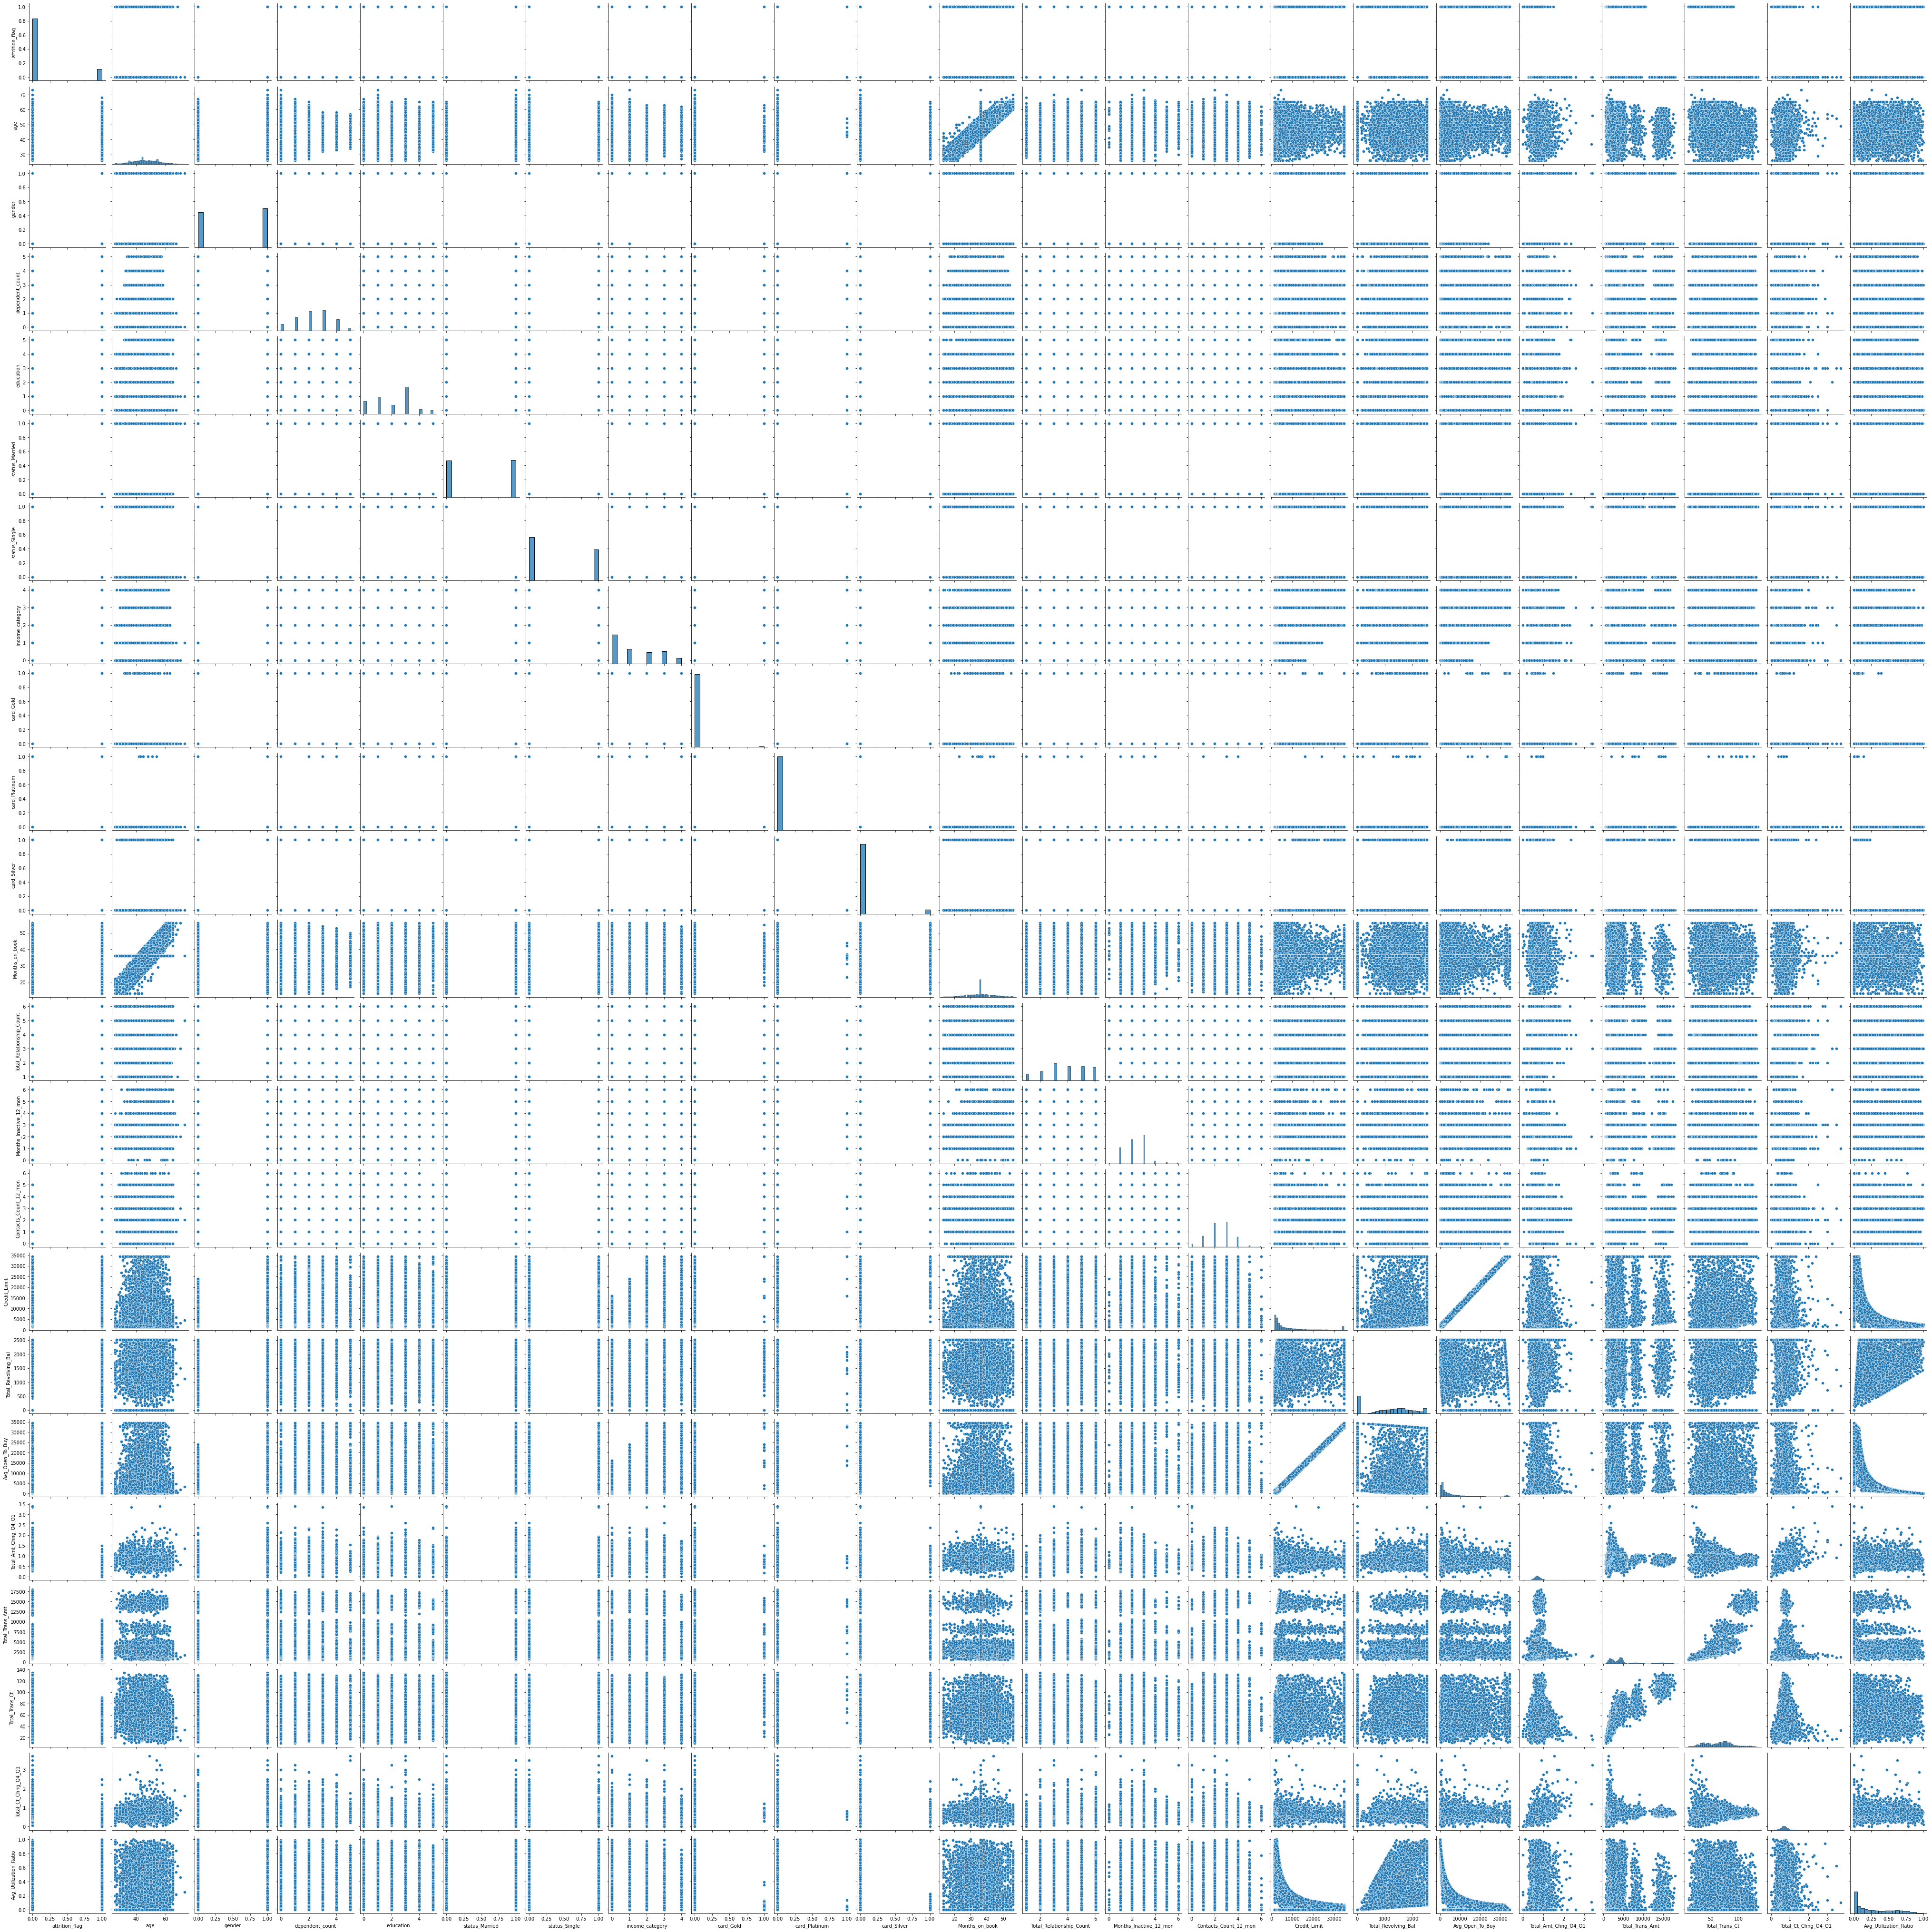

In [49]:
sns.pairplot(data=df_processed)

In [50]:
y = df_processed['attrition_flag']
y.value_counts()

0    5968
1    1113
Name: attrition_flag, dtype: int64

In [58]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights

array([0.59324732, 3.18104223])

In [64]:
class_weight_dict = {
    0: class_weights[0],
    1: class_weights[1]
}
class_weight_dict

{0: 0.5932473190348525, 1: 3.1810422282120396}

In [65]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [66]:
#Нормализуем данные
scaler = MinMaxScaler()

In [67]:
X = scaler.fit_transform(df_processed.drop('attrition_flag', axis='columns'))

In [68]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
#Создаем словарь из моделей 
model_dict = {
    'Random Forest': RandomForestClassifier(class_weight=class_weight_dict),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(class_weight=class_weight_dict),
    'SGD Classifier': SGDClassifier(class_weight=class_weight_dict),
    'Multinomial NB': MultinomialNB(),
    'Gaussian NB': GaussianNB(),
    'KNeighbors': KNeighborsClassifier()
}
model_dict

{'Random Forest': RandomForestClassifier(class_weight={0: 0.5932473190348525,
                                      1: 3.1810422282120396}),
 'Gradient Boosting': GradientBoostingClassifier(),
 'Logistic Regression': LogisticRegression(class_weight={0: 0.5932473190348525, 1: 3.1810422282120396}),
 'SGD Classifier': SGDClassifier(class_weight={0: 0.5932473190348525, 1: 3.1810422282120396}),
 'Multinomial NB': MultinomialNB(),
 'Gaussian NB': GaussianNB(),
 'KNeighbors': KNeighborsClassifier()}

In [72]:
# Обучаем модели и чекаем какая из них показывает хороший скор
for name, model in model_dict.items():
    scores = cross_val_score(model, X, y)
    print(f'{name} scores: ', scores)
    print(f'{name} mean: ', scores.mean())

Random Forest scores:  [0.87226535 0.95409605 0.96327684 0.95833333 0.84251412]
Random Forest mean:  0.9180971376625241
Gradient Boosting scores:  [0.90190543 0.94279661 0.96822034 0.96398305 0.85381356]
Gradient Boosting mean:  0.926143798667512
Logistic Regression scores:  [0.46012703 0.73234463 0.9279661  0.94562147 0.85663842]
Logistic Regression mean:  0.784539530080659
SGD Classifier scores:  [0.36273818 0.6920904  0.88983051 0.93502825 0.86158192]
SGD Classifier mean:  0.7482538505396537
Multinomial NB scores:  [0.84262526 0.84322034 0.84322034 0.84251412 0.83827684]
Multinomial NB mean:  0.8419713806123384
Gaussian NB scores:  [0.70783345 0.82485876 0.9279661  0.93149718 0.83827684]
Gaussian NB mean:  0.8460864642018429
KNeighbors scores:  [0.85603387 0.88629944 0.90183616 0.90748588 0.85169492]
KNeighbors mean:  0.8806700517126578


In [97]:
#Самые перспективные модели получились GB и RF, делаем подбор гиперпараметров

GB_optimizer = GridSearchCV(GradientBoostingClassifier(), {
    'loss': ['log_loss', 'exponential','deviance'],
    'n_estimators': [50, 75, 100, 125, 150, 175, 200],
    'criterion': ['friedman_mse', 'squared_error'],
    'max_features': ['auto', 'sqrt', 'log2']
})

In [98]:
GB_optimizer.fit(X, y)

C:\Users\Vladislav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vladislav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vladislav\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\Vladislav\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Vladislav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'exponential', 'deviance'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 75, 100, 125, 150, 175, 200]})

In [99]:
gb_optimizer_results = pd.DataFrame(GB_optimizer.cv_results_)
gb_optimizer_results[['param_loss', 'param_n_estimators', 'param_criterion', 'param_max_features', 'mean_test_score']]

param_loss param_n_estimators param_criterion param_max_features  \
0     log_loss                 50    friedman_mse               auto   
1     log_loss                 75    friedman_mse               auto   
2     log_loss                100    friedman_mse               auto   
3     log_loss                125    friedman_mse               auto   
4     log_loss                150    friedman_mse               auto   
..         ...                ...             ...                ...   
121   deviance                100   squared_error               log2   
122   deviance                125   squared_error               log2   
123   deviance                150   squared_error               log2   
124   deviance                175   squared_error               log2   
125   deviance                200   squared_error               log2   

     mean_test_score  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
..               ...  
121              NaN  
122              NaN  
123              NaN  
124              NaN  
125              NaN  

[126 rows x 5 columns]

In [100]:
print(GB_optimizer.best_params_, GB_optimizer.best_score_)

{'criterion': 'friedman_mse', 'loss': 'deviance', 'max_features': 'sqrt', 'n_estimators': 200} 0.9298156166644738


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1488)

In [117]:
gb_model = GradientBoostingClassifier(criterion='friedman_mse', loss='deviance', max_features='sqrt', n_estimators=200)

In [118]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(max_features='sqrt', n_estimators=200)

In [119]:
gb_model.score(X_test, y_test)

0.9717713479181369

In [120]:
y_predicted = gb_model.predict(X_test)
y_predicted

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [121]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1194
           1       0.96      0.86      0.91       223

    accuracy                           0.97      1417
   macro avg       0.97      0.92      0.94      1417
weighted avg       0.97      0.97      0.97      1417



In [132]:
RF_optimizer = GridSearchCV(RandomForestClassifier(), {
    'ccp_alpha':[0, 0.01,0.02],
    'n_estimators': [50,100, 150,200],
    'criterion': ['gini', 'entropy','log_loss'],
    'max_features': ['sqrt', 'log2', 'None']
})

In [133]:
RF_optimizer.fit(X,y)

C:\Users\Vladislav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vladislav\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vladislav\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Vladislav\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Vladislav\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Vladislav\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_a

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0, 0.01, 0.02],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'n_estimators': [50, 100, 150, 200]})

In [151]:
print(RF_optimizer.best_params_, RF_optimizer.best_score_)

{'ccp_alpha': 0, 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 150} 0.9293924859155773


In [152]:
rf_model = RandomForestClassifier(ccp_alpha =  0, criterion = 'entropy', max_features = 'sqrt', n_estimators = 150)

In [153]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0, criterion='entropy', max_features='sqrt',
                       n_estimators=150)

In [154]:
rf_model.score(X_test, y_test)

0.9562455892731122

In [155]:
y_predicted = rf_model.predict(X_test)
y_predicted

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [156]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1194
           1       0.92      0.79      0.85       223

    accuracy                           0.96      1417
   macro avg       0.94      0.89      0.91      1417
weighted avg       0.96      0.96      0.95      1417

